In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skewnorm
from scipy.stats import norm

import numpy as np
import pickle

import sys
sys.path.append("../")

from utils import gather_data

%load_ext autoreload
%autoreload 2

In [2]:
"""
    Load the ND data, 
    which we want to analyze
"""  

# Point this path to your data

path = "../data/smooth_k_filtered/20190728-115915-cbb159bd-b169-11e9-a755-acde48001122/out"
W = gather_data(path, "width")

W        = W[0,:,:,:]
log_mean = np.mean(np.log(W), axis=2).T
log_std  = np.std(np.log(W), axis=2).T

In [3]:
ms     = np.array([3,4,5,6], dtype="int")
ks     = np.arange(2, 4, 0.2)

/Users/mlewis/Library/Python/2.7/lib/python/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


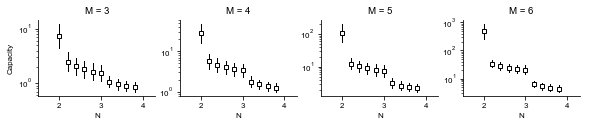

In [4]:
plt.rc("font",**{"family": "sans-serif","sans-serif": ["Arial"],"size": 8})

fig, axes = plt.subplots(figsize=(8., 1.55), ncols=len(ms), sharey=False,  tight_layout = {"pad": 0})

axes[0].set_ylabel("Capacity")
for i,ax in enumerate(axes):

    ax.set_title("M = {}".format(ms[i]))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("N")
    ax.set_yscale("log")

    ax.set_xlim(ks[0] - 0.5, ks[-1] + 0.5)

    m  = ms[i]
    m_ = i
    
    valid = np.where(ks/2 <= m)[0] 
    a = np.exp(log_mean - 1*log_std)[valid,m_]
    b = np.exp(log_mean)[valid,m_]
    c = np.exp(log_mean + 1*log_std)[valid,m_]
            
    ax.plot([ks[valid],ks[valid]] ,[a,c], linewidth=1.,color="black",linestyle="-", alpha=1.)
    ax.plot(ks[valid], b, marker="s", color="black", markerfacecolor= "white",markersize=4,linewidth=1., linestyle="none")
    

plt.savefig("../Figures/Smooth_Varying_Dimension.pdf", dpi=300, transparent=False)